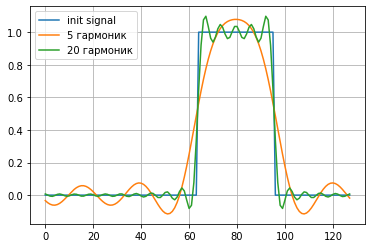

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 128
x_rect = np.zeros(N)
x_rect[64:96] = 1
T = len(x_rect)
t = np.arange(T)
def cof(x_rect, N):
    an = []
    bn = []
    for n in range(N+1):
        s = 0; s1 = 0
        for i in range(T):
            s = s + np.cos(2 * np.pi * n * i/T) * x_rect[i]
            s1 = s1 + np.sin(2 * np.pi * n * i/T) * x_rect[i]
        an.append(s * (2/T))
        bn.append(s1 * (2/T))
    return an, bn   
def recon(AB, T):
    an = AB[0]
    bn = AB[1]
    xt = np.zeros(T)
    for i in range(T):
        s = 0
        for n in range(1, len(an)):
            s = s + an[n] * np.cos(2 * np.pi * i * n/T) + bn[n] * np.sin(2 * np.pi * n * i/T)
        xt[i] = (an[0]/2 + s)
    return xt
plt.plot(x_rect, label= 'init signal')
for i in [5, 20]:
    plt.plot(t,recon(cof(x_rect, i), T), label= f'{i} гармоник')
plt.legend()
plt.grid()
plt.show()